## **결정트리**

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("csv/diabetes.csv")
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
#학습, 예측에 사용할 칼럼
feature_names = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].to_numpy()
label_name = df[['Outcome']]

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_names, label_name, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


In [37]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [56]:
#머신러닝 알고리즘 가져오기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
#예측
y_predict = model.predict(x_test)
y_predict[:5]

array([1, 0, 0, 1, 0], dtype=int64)

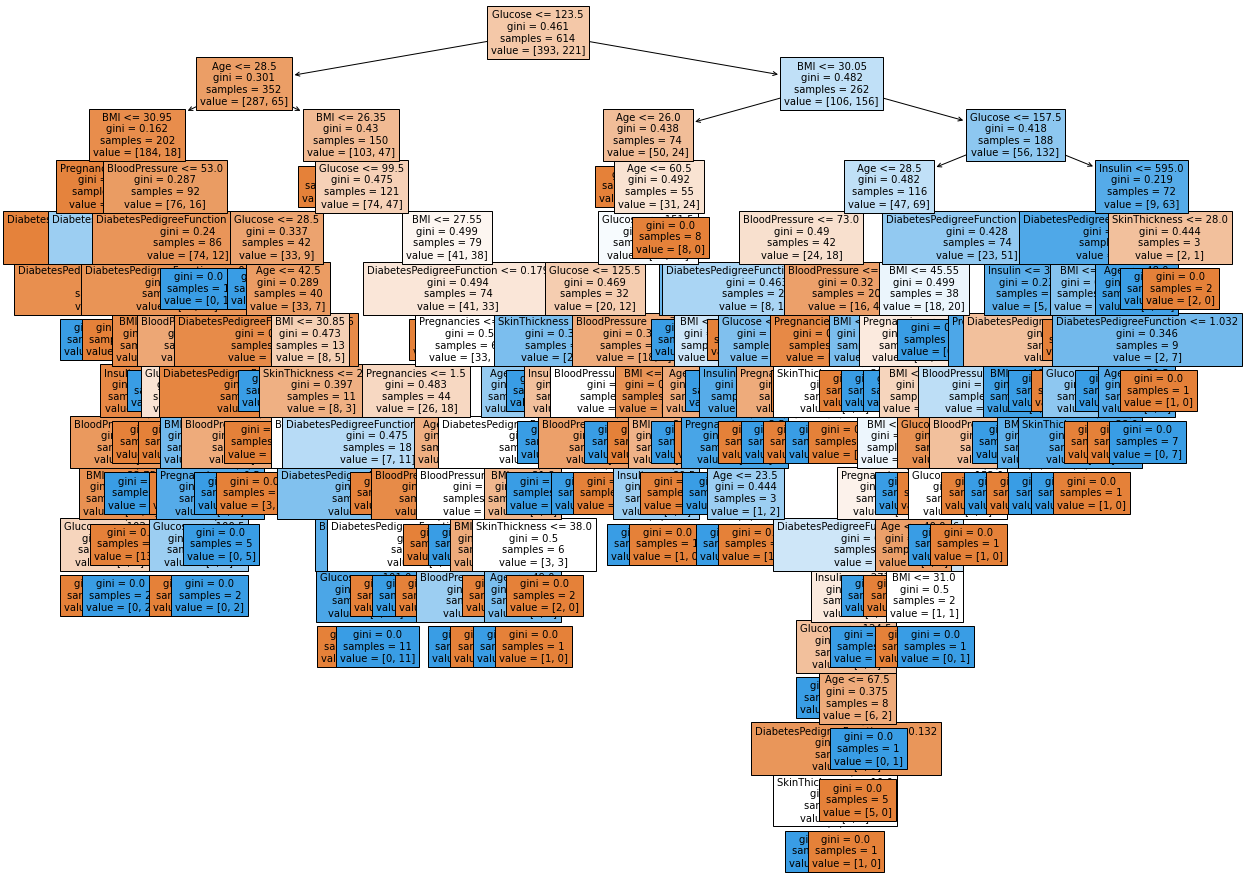

In [65]:
#트리 알고리즘 분석
from sklearn.tree import plot_tree
plt.figure(figsize = (20,16))
tree = plot_tree(model, feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], filled = True, fontsize = 10)
plt.show()

In [67]:
#feature의 중요도 산출하기
model.feature_importances_

array([0.04961129, 0.3162821 , 0.11886775, 0.0339814 , 0.03536461,
       0.19236809, 0.12432797, 0.1291968 ])

<AxesSubplot:>

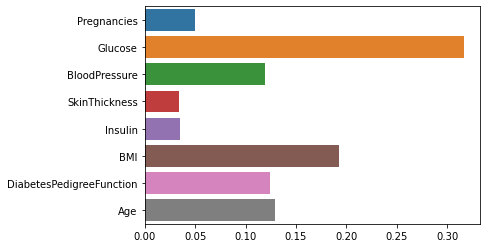

In [73]:
#feature의 중요도 시각화하기
feature_names =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.barplot(x=model.feature_importances_ , y = feature_names)

In [78]:
#정확도 측정하기
from sklearn.metrics import accuracy_score
print(np.round(accuracy_score(y_test, y_predict), decimals=2))

0.77


In [81]:
#model.score 이용해서 계산
print(np.round(model.score(x_test, y_test), decimals = 2))

0.77
